# Real estate market analyze at King County with Regression modeling.
Jiajie Xu, 07Nov21

# Overview

## Business Problem

Data analysis for King County's house sale record, using 2014-2015 house sales data from online. In order to invest new real estate, what features should future owner consider most? and what should owner don't care too much? Should owner buy a larger room than he/she actually needs?

# Data

## Data Loading/ Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import copy
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
linreg = LinearRegression()
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib import style
style.use('ggplot')
plt.ticklabel_format(style='plain')
%matplotlib inline

In [2]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is C649-A6AD

 Directory of D:\Flatiron\Project2\dsc-phase-2-project

11/12/2021  06:16 PM    <DIR>          .
10/05/2021  05:13 PM    <DIR>          ..
10/05/2021  05:13 PM               152 .canvas
10/05/2021  05:13 PM                70 .gitignore
10/28/2021  12:34 PM    <DIR>          .ipynb_checkpoints
10/05/2021  05:13 PM             1,846 CONTRIBUTING.md
10/05/2021  07:17 PM    <DIR>          data
10/05/2021  05:13 PM         2,930,391 halfway-there.gif
10/05/2021  05:13 PM             1,354 LICENSE.md
11/12/2021  06:16 PM           965,981 Phase_2_project.ipynb
10/05/2021  05:13 PM             4,151 README.md
               7 File(s)      3,903,945 bytes
               4 Dir(s)  1,999,968,813,056 bytes free


In [3]:
cd data/

D:\Flatiron\Project2\dsc-phase-2-project\data


In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.isna().sum().sum()

6281

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Missing value in waterfront and yr_renovated. Usually, value in such features would not be forgotten since it infulence the sale price. Therefore, use 0 replace the NaN should be fine to modify the data set.

In [9]:
# For the whole DataFrame using pandas to change NaN to 0
df = df.fillna(0)

### Review each colunm and clean data

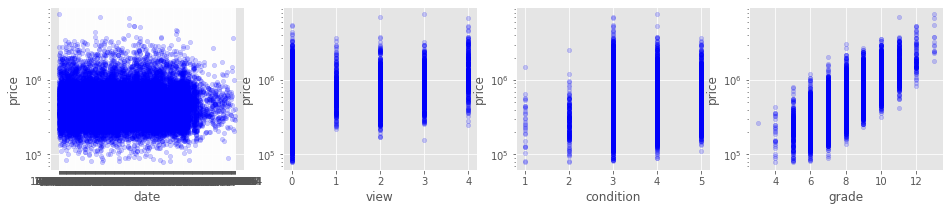

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'view', 'condition', 'grade' ], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

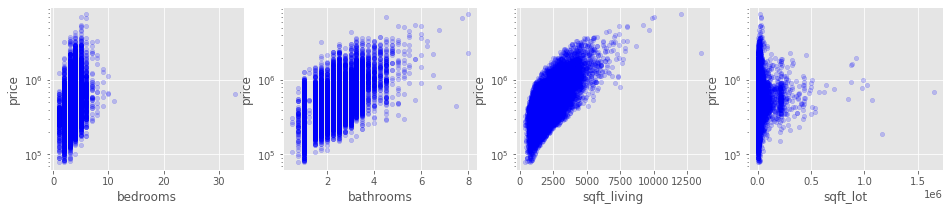

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

In [12]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [13]:
df[df['bedrooms'] == df['bedrooms'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


The row number 15856's bedroom is too high to be counted, so delete this line is better for the whole model. 

In [14]:
df = df.drop(df.index[15856])

In [15]:
df[df['sqft_lot'] == df['sqft_lot'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581


In [16]:
# row 1717's sqft_lot(1651359) is too hign as well, drop this line.
df = df.drop(df.index[1717])

In [17]:
df[df['sqft_living'] == df['sqft_living'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [18]:
# row 12764's price(1651359) is too low as well, drop this line.
df.drop([12764], axis = 0, inplace=True)

In [19]:
df[df['sqft_living'] == df['sqft_living'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


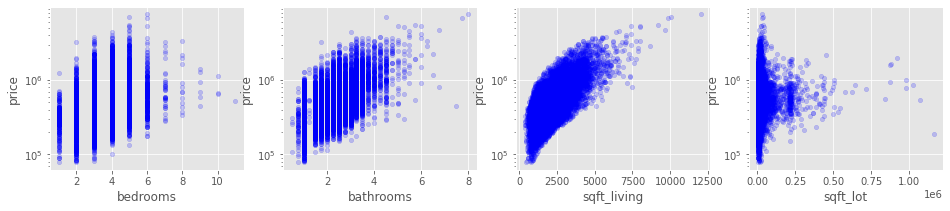

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

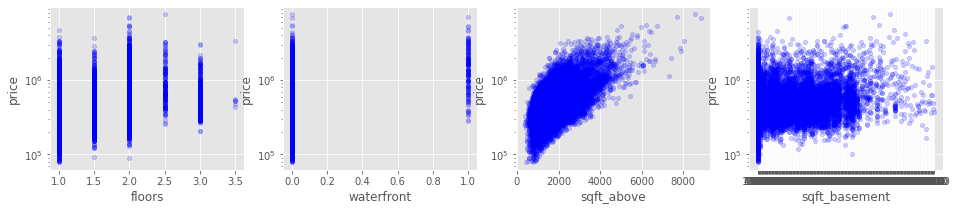

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

Preprocessing for 'sqft_basement'

In [22]:
(df['sqft_basement'] == '?').sum()

454

In [23]:
# Using replace() function for a single column, change '?' to 0
df['sqft_basement'] = df['sqft_basement'].replace('?', 0)

In [24]:
df['sqft_basement'] = df['sqft_basement'].fillna(0)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement']).astype(np.int64)

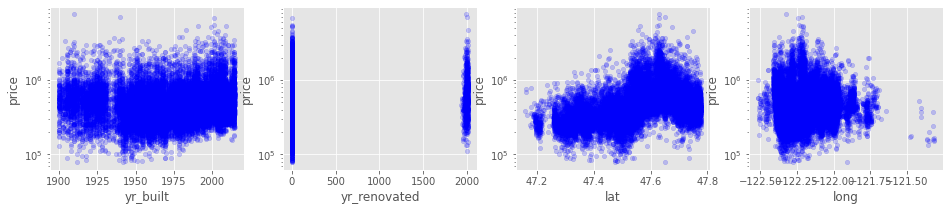

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated', 'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

### Data scalling. 

In [26]:
#rescaling 'yr_built'
df['yr_built'] = np.log(df['yr_built'])

In [27]:
# preprocessing for rescaling
# x_cols = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']
# for col in x_cols:
#     df[col] = (df[col] - df[col].mean())/df[col].std()
# df.head()

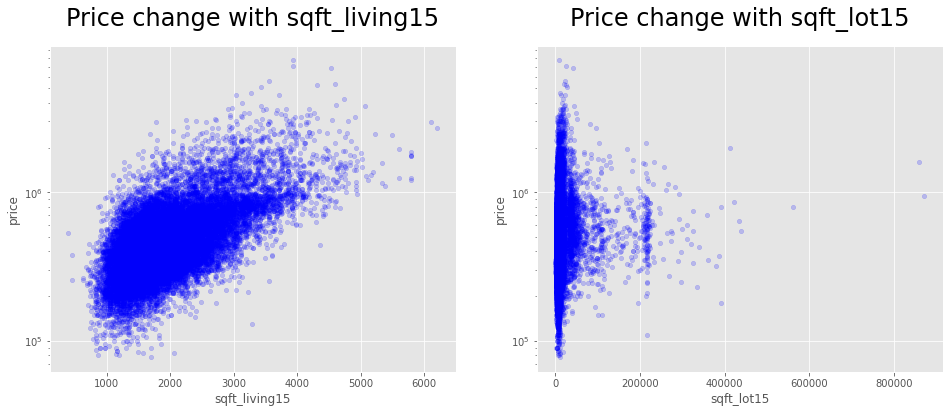

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

for xcol, ax in zip(['sqft_living15', 'sqft_lot15' ], axes):
    plot1 = df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)
    plot1.set_title("Price change with {0}".format(xcol),pad=20, fontdict={'fontsize':24})

In [29]:
df[df['sqft_lot15'] == df['sqft_lot15'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,1/7/2015,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,...,11,3605,1940,7.602401,0.0,98014,47.676,-121.882,3420,871200


### Data filtering 

In [30]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21594, dtype: object

Sale date group all within one year, which doesn't influence much. Thus, it would be appropriate to drop 'date' column.

In [31]:
# So does 'view'
print(df['view'].describe())

count    21594.000000
mean         0.232889
std          0.764062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64


In [32]:
df = df.drop(['id', 'date', 'view'], axis=1)

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0,7.578145,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,7.576097,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,7.566828,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,7.583248,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,7.594381,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
# fig = plt.figure(figsize = (15,15))
# ax = fig.gca()
# df.hist(ax = ax);

In [35]:
# pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
# plt.show()

In [36]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315353,0.525279,0.702124,0.091042,0.256412,0.264466,0.036171,0.667773,0.604894,0.319936,0.052578,0.117965,-0.053315,0.306770,0.021678,0.584886,0.081479
bedrooms,0.315353,1.000000,0.527438,0.593267,0.032256,0.183325,-0.002037,0.023538,0.365805,0.492010,0.302569,0.160747,0.018674,-0.158534,-0.011669,0.136283,0.404053,0.030220
bathrooms,0.525279,0.527438,1.000000,0.755074,0.092147,0.502330,0.063741,-0.126340,0.665604,0.685677,0.276242,0.505896,0.047294,-0.204978,0.023904,0.224745,0.569493,0.087351
sqft_living,0.702124,0.593267,0.755074,1.000000,0.178322,0.353646,0.105061,-0.059213,0.763630,0.876006,0.425907,0.317840,0.051344,-0.200298,0.051832,0.241218,0.757083,0.182456
sqft_lot,0.091042,0.032256,0.092147,0.178322,1.000000,-0.004223,0.022491,-0.010666,0.120733,0.189777,0.013919,0.058527,0.005597,-0.132561,-0.084649,0.236214,0.147527,0.720024
floors,0.256412,0.183325,0.502330,0.353646,-0.004223,1.000000,0.020805,-0.263954,0.458503,0.523894,-0.243484,0.485390,0.003803,-0.059520,0.049096,0.125799,0.279741,-0.011140
waterfront,0.264466,-0.002037,0.063741,0.105061,0.022491,0.020805,1.000000,0.016661,0.082856,0.071950,0.083232,-0.024367,0.073937,0.028920,-0.012162,-0.037624,0.083876,0.030949
condition,0.036171,0.023538,-0.126340,-0.059213,-0.010666,-0.263954,0.016661,1.000000,-0.146744,-0.158851,0.169019,-0.360159,-0.055794,0.002866,-0.015089,-0.105823,-0.092934,-0.003533
grade,0.667773,0.365805,0.665604,0.763630,0.120733,0.458503,0.082856,-0.146744,1.000000,0.756219,0.164676,0.446617,0.015644,-0.185823,0.113371,0.200229,0.713761,0.121527
sqft_above,0.604894,0.492010,0.685677,0.876006,0.189777,0.523894,0.071950,-0.158851,0.756219,1.000000,-0.055100,0.422918,0.020753,-0.261911,-0.001559,0.344881,0.731748,0.193944


We set 0.75 as a cut-off range for correlations between variables. 

In [37]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False


It seems like the column 'sqft_living', 'bathrooms', 'grade', 'sqft_above',  and 'sqft_living15'are all pretty highly correlated among each other.

In [38]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df2 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [39]:
df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876006
"(sqft_living, grade)",0.763630
"(sqft_living15, sqft_living)",0.757083
"(sqft_above, grade)",0.756219
"(bathrooms, sqft_living)",0.755074


'bathrooms', 'grade', 'sqft_above', 'sqft_living15' have strong corralation with 'sqft_living'. Therefore, drop these four. Besidea, 'zipcode'provide less info compares to 'long' and 'lat', drop 'Zipcode' as well.

In [40]:
df = df.drop(['bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'zipcode'], axis=1)

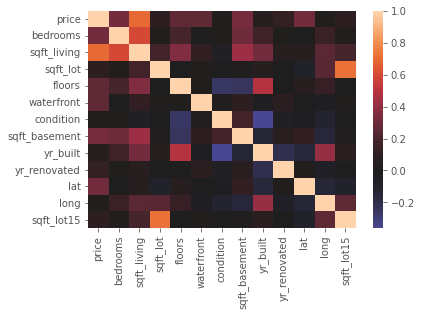

In [41]:
# Heatmap to render the correlation matrix as a visualization.
sns.heatmap(df.corr(), center=0);

In [42]:
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
0,221900.0,3,1180,5650,1.0,0.0,3,0,7.578145,0.0,47.5112,-122.257,5650
1,538000.0,3,2570,7242,2.0,0.0,3,400,7.576097,1991.0,47.7210,-122.319,7639
2,180000.0,2,770,10000,1.0,0.0,3,0,7.566828,0.0,47.7379,-122.233,8062
3,604000.0,4,1960,5000,1.0,0.0,5,910,7.583248,0.0,47.5208,-122.393,5000
4,510000.0,3,1680,8080,1.0,0.0,3,0,7.594381,0.0,47.6168,-122.045,7503


A Model Using the Raw Features

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   sqft_living    21594 non-null  int64  
 3   sqft_lot       21594 non-null  int64  
 4   floors         21594 non-null  float64
 5   waterfront     21594 non-null  float64
 6   condition      21594 non-null  int64  
 7   sqft_basement  21594 non-null  int64  
 8   yr_built       21594 non-null  float64
 9   yr_renovated   21594 non-null  float64
 10  lat            21594 non-null  float64
 11  long           21594 non-null  float64
 12  sqft_lot15     21594 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 2.3 MB


Regression Model Validation.

In order to get a good sense of how well your model will be doing on new instances, you'll have to perform a so-called "train-test-split". What you'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets  𝑦  and the fitted  𝑦̂   obtained by our model.

## Data seperation 

### Data split into train set and test set

In [44]:
y = df[['price']]
X = df.drop(['price'], axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [46]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17275 4319 17275 4319


In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [48]:
y_hat_train

array([[ 556846.87720931],
       [ 657800.2534114 ],
       [ 262017.07969045],
       ...,
       [ 469236.60541345],
       [1102653.84970527],
       [ 689355.08669648]])

In [49]:
y_hat_test

array([[ 491297.61566082],
       [2432373.83509988],
       [ 418184.47775562],
       ...,
       [ 864883.85945253],
       [ 488687.9052088 ],
       [ 579590.95462436]])

Look at the residuals and calculate the MSE for training and test sets:

In [50]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [51]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    4.860660e+10
dtype: float64
Test Mean Squarred Error: price    4.661225e+10
dtype: float64


### Cross-Validation

The code below repeats a train-test split creation 20 times, using a test_size of 0.33. So what happens is, each time a new (random) train-test split is created. See how training and testing MSEs swing around by just taking another sample!

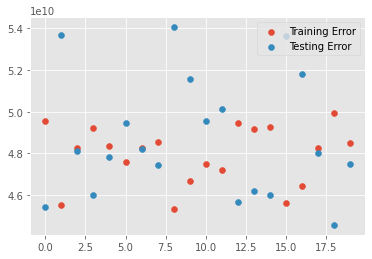

In [52]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [53]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [54]:
cv_5_results

-48615169153.442276

In [55]:
cv_10_results

-48524218146.92415

In [56]:
cv_20_results

-48372694517.18513

A Model Using the Raw Features

In [57]:
y = df[['price']]
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [58]:
train = y_train.join(X_train)

In [59]:
test = y_test.join(X_test)

In [60]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2608.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:18:36   Log-Likelihood:            -2.3713e+05
No. Observations:               17275   AIC:                         4.743e+05
Df Residuals:                   17262   BIC:                         4.744e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.249e+07   2.52e+06    -12.879      0.000   -3.74e+07   -2.75e+07
bedrooms      -5.507e+04   2355.343    -23.381      0.000   -5.97e+04   -5.05e+04
sqft_living     328.8514      2.939    111.895      0.000     323.091     334.612
sqft_lot          0.1182      0.061      1.928      0.054      -0.002       0.238
floors         3.036e+04   4165.009      7.290      0.000    2.22e+04    3.85e+04
waterfront     8.271e+05   2.09e+04     39.649      0.000    7.86e+05    8.68e+05
condition      3.465e+04   2862.026     12.105      0.000     2.9e+04    4.03e+04
sqft_basement   -40.3680      5.087     -7.935      0.000     -50.340     -30.396
yr_built      -2.734e+06   1.56e+05    -17.503      0.000   -3.04e+06   -2.43e+06
yr_renovated     41.0654      4.826      8.509      0.000      31.606      50.525
lat            6.431e+05   1.27e+04     50.733      0.000    6.18e+05    6.68e+05
long          -1.843e+05   1.42e+04    -12.984      0.000   -2.12e+05   -1.56e+05
sqft_lot15       -0.3698      0.091     -4.050      0.000      -0.549      -0.191
==============================================================================
Omnibus:                    12202.438   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           610660.952
Skew:                           2.840   Prob(JB):                         0.00
Kurtosis:                      31.568   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Selecting Features Based on p-values

All features are significant, sqft_lot p value above 0.05, so drop sqft_lot. 

In [61]:
df = df.drop(['sqft_lot'], axis=1)
y = df[['price']]
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [62]:
df.head()

,price,bedrooms,sqft_living,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
0,221900.0,3,1180,1.0,0.0,3,0,7.578145,0.0,47.5112,-122.257,5650
1,538000.0,3,2570,2.0,0.0,3,400,7.576097,1991.0,47.7210,-122.319,7639
2,180000.0,2,770,1.0,0.0,3,0,7.566828,0.0,47.7379,-122.233,8062
3,604000.0,4,1960,1.0,0.0,5,910,7.583248,0.0,47.5208,-122.393,5000
4,510000.0,3,1680,1.0,0.0,3,0,7.594381,0.0,47.6168,-122.045,7503


In [63]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2845.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:18:36   Log-Likelihood:            -2.3713e+05
No. Observations:               17275   AIC:                         4.743e+05
Df Residuals:                   17263   BIC:                         4.744e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.214e+07   2.52e+06    -12.773      0.000   -3.71e+07   -2.72e+07
bedrooms      -5.522e+04   2354.206    -23.457      0.000   -5.98e+04   -5.06e+04
sqft_living     329.2533      2.932    112.306      0.000     323.507     335.000
floors         3.028e+04   4165.112      7.270      0.000    2.21e+04    3.84e+04
waterfront     8.269e+05   2.09e+04     39.636      0.000    7.86e+05    8.68e+05
condition      3.453e+04   2861.612     12.066      0.000    2.89e+04    4.01e+04
sqft_basement   -40.5016      5.087     -7.961      0.000     -50.473     -30.530
yr_built      -2.747e+06   1.56e+05    -17.603      0.000   -3.05e+06   -2.44e+06
yr_renovated     40.9721      4.826      8.489      0.000      31.512      50.432
lat            6.422e+05   1.27e+04     50.692      0.000    6.17e+05    6.67e+05
long          -1.827e+05   1.42e+04    -12.890      0.000    -2.1e+05   -1.55e+05
sqft_lot15       -0.2486      0.066     -3.755      0.000      -0.378      -0.119
==============================================================================
Omnibus:                    12192.702   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           607926.542
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      31.502   Cond. No.                     4.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model

### Model validation by test set 

In [65]:
# fit a model
predictions = model.predict(X_test)

In [66]:
predictions

9399     4.978477e+05
6227     2.420069e+06
19778    4.176605e+05
1443     4.406433e+05
17437    3.492576e+05
             ...     
8209     8.179439e+05
9843     4.095482e+05
3103     8.720857e+05
2094     4.896946e+05
10343    5.823229e+05
Length: 4319, dtype: float64

In [67]:
predictions[0:5]

9399     4.978477e+05
6227     2.420069e+06
19778    4.176605e+05
1443     4.406433e+05
17437    3.492576e+05
dtype: float64

Text(0, 0.5, 'Predictions')

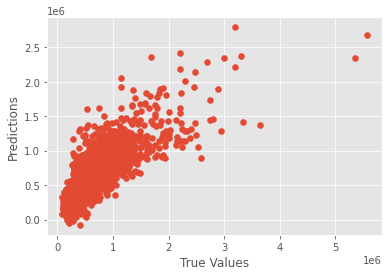

In [68]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6421216035522224

In [70]:
print ("Score:", model.score(X_test, y_test))

Score: 0.6421216035522224


In [71]:
# pd.plotting.scatter_matrix(df[x_cols], figsize=(20,20));

Transforming Non-Normal Features

In [72]:
# fig = plt.figure(figsize = (15,15))
# ax = fig.gca()
# df.hist(ax = ax);

In [73]:
df.head()

,price,bedrooms,sqft_living,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
0,221900.0,3,1180,1.0,0.0,3,0,7.578145,0.0,47.5112,-122.257,5650
1,538000.0,3,2570,2.0,0.0,3,400,7.576097,1991.0,47.7210,-122.319,7639
2,180000.0,2,770,1.0,0.0,3,0,7.566828,0.0,47.7379,-122.233,8062
3,604000.0,4,1960,1.0,0.0,5,910,7.583248,0.0,47.5208,-122.393,5000
4,510000.0,3,1680,1.0,0.0,3,0,7.594381,0.0,47.6168,-122.045,7503


### Mean absolute error regression loss.

In [74]:
# Mean absolute error regression loss.
mean_absolute_error(y_test, predictions)

136854.31034936104

# Additional Assessments and Refinement

## Checking for variance factor

In [75]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 23.67058100632562),
 ('sqft_living', 15.702988057558194),
 ('floors', 13.8238866576625),
 ('waterfront', 1.0368024387338126),
 ('condition', 33.32896709443981),
 ('sqft_basement', 2.3929139359159053),
 ('yr_built', 217949.6222080384),
 ('yr_renovated', 1.1091528733679479),
 ('lat', 116177.48962681426),
 ('long', 314517.33445671404),
 ('sqft_lot15', 1.326312912494951)]

## Investigating Linearity

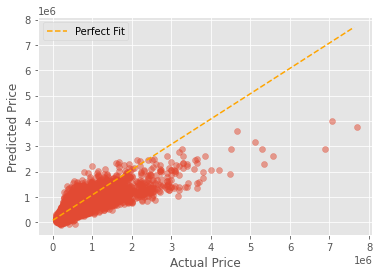

In [76]:
preds = model.predict(X)
fig, ax = plt.subplots()

perfect_line = np.arange(y.min().min(), y.max().max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

## Investigating Normality

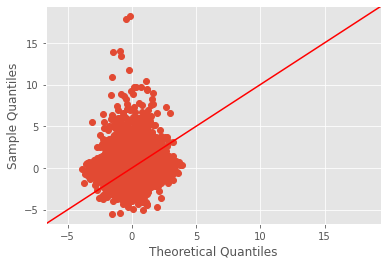

In [77]:
residuals = (y - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

## Investigating Multicollinearity (Independence Assumption)

In [78]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, index=X.columns, name="Variance Inflation Factor")

bedrooms             23.670581
sqft_living          15.702988
floors               13.823887
waterfront            1.036802
condition            33.328967
sqft_basement         2.392914
yr_built         217949.622208
yr_renovated          1.109153
lat              116177.489627
long             314517.334457
sqft_lot15            1.326313
Name: Variance Inflation Factor, dtype: float64

## Investigating Homoscedasticity

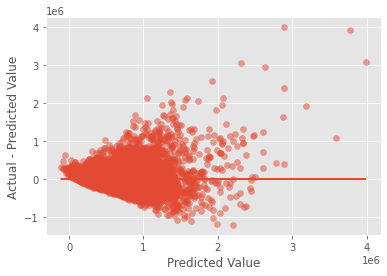

In [79]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Investigating 4 features after drop 'price' outlier

<AxesSubplot:xlabel='price'>

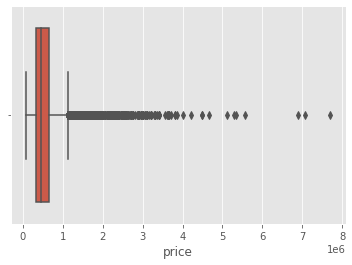

In [80]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

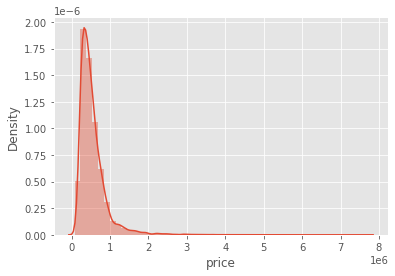

In [81]:
sns.distplot(df['price'])

In [82]:
upper_limit = df['price'].quantile(0.99)
upper_limit

1960699.9999999972

In [83]:
lower_limit = df['price'].quantile(0.01)
lower_limit

154000.0

<AxesSubplot:xlabel='price'>

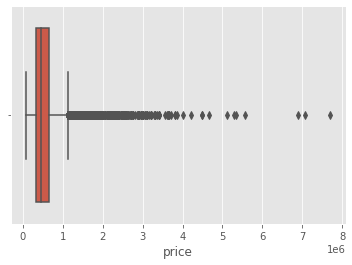

In [84]:
sns.boxplot(df['price'])

In [85]:
# lower_line = df['price'].quantile(0.25)
# upper_line = df['price'].quantile(0.75)
# IQR = upper_line - lower_line    #IQR is interquartile range. 

# filter = (df['price'] >= lower_line - 1.5 * IQR) & (df['price'] <= upper_line + 1.5 *IQR)
# df.loc[filter]  
# new_df1 = df.loc[filter] 
# sns.boxplot(new_df1['price'])

In [86]:
new_df = df[(df['price'] <= 1960000.0) & (df['price'] >= 154000.0)]

<AxesSubplot:xlabel='price', ylabel='Density'>

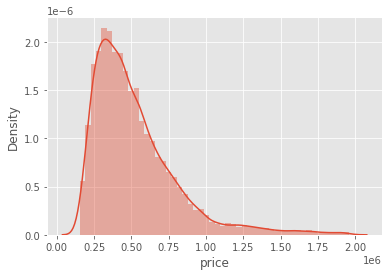

In [87]:
sns.distplot(new_df['price'])

<AxesSubplot:xlabel='price'>

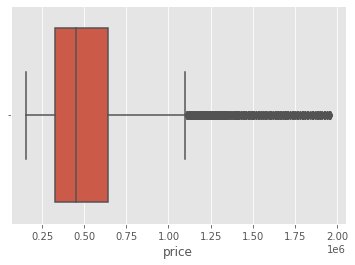

In [88]:
sns.boxplot(new_df['price'])

### Linearity

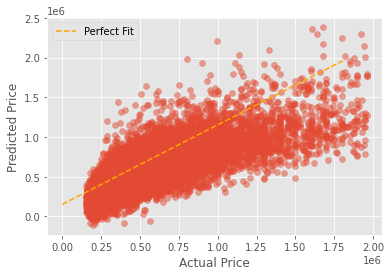

In [89]:
y = new_df[['price']]
X = new_df.drop(['price'], axis=1)

preds = model.predict(X)
fig, ax = plt.subplots()

perfect_line = np.arange(y.min().min(), y.max().max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Normality

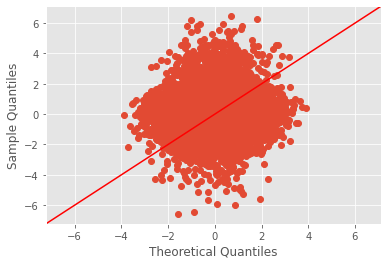

In [90]:
residuals = (y - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

### Multicollinearity (Independence Assumption)

In [91]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, index=X.columns, name="Variance Inflation Factor")

bedrooms             24.086933
sqft_living          16.841997
floors               13.852622
waterfront            1.020582
condition            33.767781
sqft_basement         2.349524
yr_built         221357.190616
yr_renovated          1.107594
lat              115787.612432
long             319256.986811
sqft_lot15            1.327702
Name: Variance Inflation Factor, dtype: float64

### Homoscedasticity

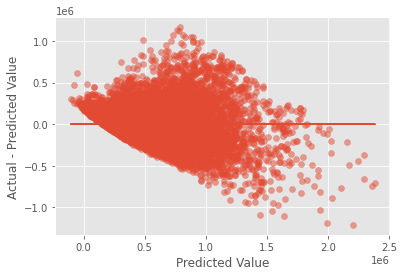

In [92]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Questions

## Q1 what features should future owner consider most? 

In [93]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2845.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:18:43   Log-Likelihood:            -2.3713e+05
No. Observations:               17275   AIC:                         4.743e+05
Df Residuals:                   17263   BIC:                         4.744e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.214e+07   2.52e+06    -12.773      0.000   -3.71e+07   -2.72e+07
bedrooms      -5.522e+04   2354.206    -23.457      0.000   -5.98e+04   -5.06e+04
sqft_living     329.2533      2.932    112.306      0.000     323.507     335.000
floors         3.028e+04   4165.112      7.270      0.000    2.21e+04    3.84e+04
waterfront     8.269e+05   2.09e+04     39.636      0.000    7.86e+05    8.68e+05
condition      3.453e+04   2861.612     12.066      0.000    2.89e+04    4.01e+04
sqft_basement   -40.5016      5.087     -7.961      0.000     -50.473     -30.530
yr_built      -2.747e+06   1.56e+05    -17.603      0.000   -3.05e+06   -2.44e+06
yr_renovated     40.9721      4.826      8.489      0.000      31.512      50.432
lat            6.422e+05   1.27e+04     50.692      0.000    6.17e+05    6.67e+05
long          -1.827e+05   1.42e+04    -12.890      0.000    -2.1e+05   -1.55e+05
sqft_lot15       -0.2486      0.066     -3.755      0.000      -0.378      -0.119
==============================================================================
Omnibus:                    12192.702   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           607926.542
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      31.502   Cond. No.                     4.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the summary, if owner want to invest a new house. Bigger living room, waterfront, and north area of King County should be considered. Those three are the most important features when market valuate the property.  

## Q2 what should owner don't care too much? 

In [94]:
df_year_long_bedrooms = df[['price', 'bedrooms', 'yr_built', 'long']]

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2845.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:18:43   Log-Likelihood:            -2.3713e+05
No. Observations:               17275   AIC:                         4.743e+05
Df Residuals:                   17263   BIC:                         4.744e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.214e+07   2.52e+06    -12.773      0.000   -3.71e+07   -2.72e+07
bedrooms      -5.522e+04   2354.206    -23.457      0.000   -5.98e+04   -5.06e+04
sqft_living     329.2533      2.932    112.306      0.000     323.507     335.000
floors         3.028e+04   4165.112      7.270      0.000    2.21e+04    3.84e+04
waterfront     8.269e+05   2.09e+04     39.636      0.000    7.86e+05    8.68e+05
condition      3.453e+04   2861.612     12.066      0.000    2.89e+04    4.01e+04
sqft_basement   -40.5016      5.087     -7.961      0.000     -50.473     -30.530
yr_built      -2.747e+06   1.56e+05    -17.603      0.000   -3.05e+06   -2.44e+06
yr_renovated     40.9721      4.826      8.489      0.000      31.512      50.432
lat            6.422e+05   1.27e+04     50.692      0.000    6.17e+05    6.67e+05
long          -1.827e+05   1.42e+04    -12.890      0.000    -2.1e+05   -1.55e+05
sqft_lot15       -0.2486      0.066     -3.755      0.000      -0.378      -0.119
==============================================================================
Omnibus:                    12192.702   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           607926.542
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      31.502   Cond. No.                     4.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the summary and seatle map, King county downtown is at west side, which means more close to downtown and US west coast is more experience. Meanwhile, older houses are usually more experience. 

According to the model.summary(), bedrooms, square feet of basement and year of build are the top 3 negative features. ​

Reason：​

1. House with too many bedrooms are not as hot as house with bedrooms less than 5. ​

2. Seattle is a place less likely to snow but rich of rain. Basement is damp and dark. Besides, basement like such contains more Radon gas, and Radon is a naturally-occurring radioactive gas that can cause lung cancer. ​

3. New build house are usually far from waterfront, downtown, coastline and school, those area usually been occupied with older houses. 

## Q3 Should owner buy a house with mores room than he/she actually needs?

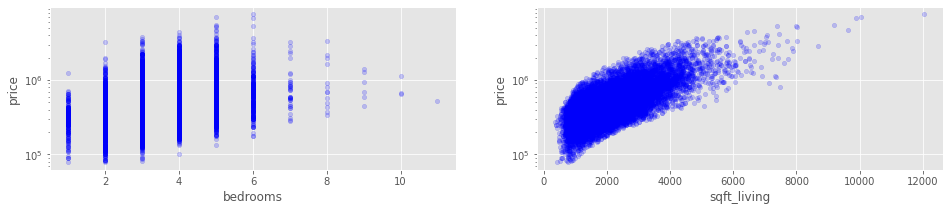

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'sqft_living'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b', logy=True)

From the histogram and model summary, we conclude that less bedrooms, more living room sqft and more lot sqft would increase the price. If actual bedrooms need is more than 5, more bedrooms usually get a less price house. We speculate this may because those big house are less popular and hot than bedrooms number less than 5. 

# Conclusion

After analysis, my team believe this is the best time getting into valuable house.

We would suggest：

1. Bigger living room, waterfront, and north area of King County should be considered.

2. For King county, downtown and US west coast is more experience.

3. Bedrooms no more than 5 are more popular and hot to trade.

# Future work

1. With more time, I would like to look into 'zip' column see if I can find more valuable information.

2. For house sale in different months, I want to check if sale price and deal made amount change accordingly. I may need to search for more sales record in different year to get a convincing trend for that. 

3. There are more features might influence price like world economic  environment, Nasdaq Index, pandemic, etc. I want to merge more features to get a better model for the price prediction. 